In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
f= lambda t,l: (y0-1)*np.exp(l*t)+np.exp(-t)

In [ ]:
y0=0.0
#l=-5.0
t=np.linspace(0,1,100)
plt.plot(t,f(t,-5.0),label=r'$\lambda=-1.0$')
plt.plot(t,f(t,-10.0),label=r'$\lambda=-10.0$')
plt.plot(t,f(t,-200.0),label=r'$\lambda=-200.0$')
plt.legend()

In [ ]:
import numpy as np
from scipy.integrate import odeint

## Funciones anónimas

In [ ]:
def f(x): 
    return x**2

In [ ]:
f(8)

In [ ]:
f= lambda x: x**2

In [ ]:
f(8)

### Ejemplo 1

Queremos resolver:

$\frac{dy\left(t\right)}{dt}=y\left(t\right),\qquad y\left(0\right)=2$

para $t=5$

In [ ]:
#Definimos la función
f=lambda y, t:y

Función _odeint_

* Primer argumento: Función
* Segundo argumento: Valor inicial de $y$
* Tercer argumento: Valor inicial de $t$ y valor final de $t$ 

In [ ]:
odeint(f,2,[0,5,15])

In [ ]:
odeint(lambda y, t:y,2,[0,5,15])

### Ejemplo 2

$\ddot{y}\left(t\right)+\omega^{2}y\left(t\right)=0,\qquad y\left(0\right)=1,\qquad\dot{y}\left(0\right)=0$

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
%pylab qt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
def rhs(Y,t,omega):
    y,ydot=Y
    return ydot, -omega**2*y

In [6]:
t_arr=np.linspace(0,2*np.pi,101)
y_init=[1,0]
omega=2.0
y_arr=odeint(rhs,y_init,t_arr,args=(omega,))
y,ydot=y_arr[:,0],y_arr[:,1]
plt.ion()
plt.figure()
plt.plot(t_arr,y,t_arr,ydot)
plt.show()

In [7]:
plt.clf()
plt.figure()
plt.plot(y,ydot)
plt.title("Solucion para omega =%2i"%omega)

In [8]:
plt.figure()
y,ydot=np.mgrid[-3:3:21j,-6:6:21j]
u,v=rhs(np.array([y,ydot]),0,omega)
mag=np.hypot(u,v)
mag[mag==0]=1.0
plt.quiver(y,ydot,u/mag,v/mag,color='red')

In [ ]:
print("\n\n\nUsar el mouse para seleccionar el punto de inicio")
print("Se acaba el tiempo a los 30 segundos")

In [ ]:
choice=plt.ginput()
while (len(choice)>0 and len(choice)<3):
    y01=np.array([choice[0][0],choice[0][1]])
    y=odeint(rhs,y01,t_arr,args=(omega,))
    plt.plot(y[:,0],y[:,1],lw=2)
    choice=plt.ginput()

In [ ]:
print ("Tiempo agotado")

# Ecuaciones de Lorenz

$\dot{x}=\sigma\left(y-x\right)$

$\dot{y}=\rho x-y-xz$

$\dot{z}=xy-\beta z$

Se suelen dejar fijos, por razones históricas, $\sigma=10$ y $\beta=8/3$. 

In [1]:
import numpy as np
from scipy.integrate import odeint

In [2]:
def rhs(u,t,beta,rho,sigma):
    x,y,z = u
    return [sigma*(y-x), rho*x-y-x*z, x*y-beta*z]

Para $\rho>\rho_{H}\thickapprox24.7$ la solución se vuelve aperiódica y su comportamiento depende sensiblemente de las condiciones iniciales

In [3]:
sigma=10.0
beta=8.0/3.0
rho1=20.0
rho2=12.8
rho1=29.0
#rho2=28.8

In [4]:
u01=[1.0,1.0,1.0]
u02=[1.0,1.0,1.0]

In [5]:
t=np.linspace(0.0,50.0,10001)
u1=odeint(rhs,u01,t,args=(beta,rho1,sigma))
u2=odeint(rhs,u02,t,args=(beta,rho2,sigma))

In [6]:
x1,y1,z1=u1[:, 0],u1[:, 1],u1[:, 2]
x2,y2,z2=u2[:, 0],u2[:, 1],u2[:, 2]  

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

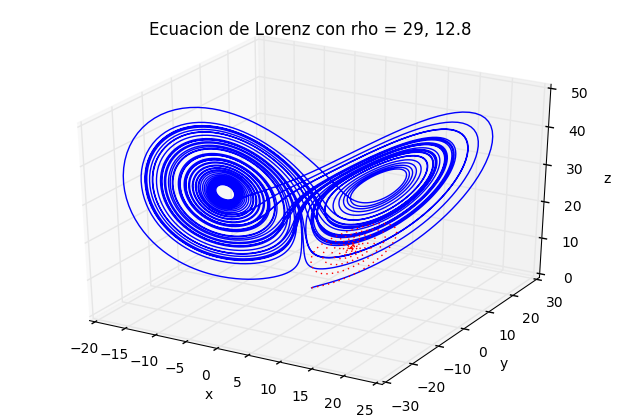

In [8]:
fig=plt.figure()
ax=Axes3D(fig)
ax.plot(x1,y1,z1,"b-")
ax.plot(x2,y2,z2,"r:")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Ecuacion de Lorenz con rho = %g, %g" % (rho1,rho2))
plt.show()